In [1]:
import math, h5py, scipy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
# from kerastuner.tuners import Hyperband
# import keras_tuner as kt
# from keras.callbacks import EarlyStopping
import cv2

Set GPU

In [2]:
# Check GPU
physical_devices = tf.config.list_physical_devices('GPU')
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.98)
#sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.keras.backend.set_floatx('float32') #for memory use

Load Data

In [3]:
from DataLoader_regression_new import DataLoader
data_loader = DataLoader("dataset_1_new.hdf5")
data_loader.divide_data(train_percentage=0.6, valid_percentage=0.2, test_percentage=0.2)

x_train, y_train = data_loader.get_train_data_fn()
x_valid, y_valid,_ = data_loader.get_validation_data()
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

outputs size is:  (1, 2)
outputs size is:  (2, 2)
outputs size is:  (3, 2)
outputs size is:  (4, 2)
outputs size is:  (5, 2)
outputs size is:  (6, 2)
outputs size is:  (7, 2)
outputs size is:  (8, 2)
outputs size is:  (9, 2)
outputs size is:  (10, 2)
outputs size is:  (11, 2)
outputs size is:  (12, 2)
outputs size is:  (13, 2)
outputs size is:  (14, 2)
outputs size is:  (15, 2)
outputs size is:  (16, 2)
outputs size is:  (17, 2)
outputs size is:  (18, 2)
outputs size is:  (19, 2)
outputs size is:  (20, 2)
outputs size is:  (21, 2)
outputs size is:  (22, 2)
outputs size is:  (23, 2)
outputs size is:  (24, 2)
outputs size is:  (25, 2)
outputs size is:  (26, 2)
outputs size is:  (27, 2)
outputs size is:  (28, 2)
outputs size is:  (29, 2)
outputs size is:  (30, 2)
outputs size is:  (31, 2)
outputs size is:  (32, 2)
outputs size is:  (33, 2)
outputs size is:  (34, 2)
outputs size is:  (35, 2)
outputs size is:  (36, 2)
outputs size is:  (37, 2)
outputs size is:  (38, 2)
outputs size is:  (39

In [5]:
# resize images array 
#from skimage.transform import resize

# original shape is (260, 346, 6) == convert to (130, 173, 6)
def resize_images(image_arrays, size=[130, 173], n_channels=3):
    image_arrays = (image_arrays)

    resized_image_arrays = np.zeros([image_arrays.shape[0]] + size + [n_channels])
    # print ("image array size: ", image_arrays.shape)
    # print ("resized image array size: ", resized_image_arrays.shape)
    for i, image_array in enumerate(image_arrays):
        #print ("image array size: ", image_array.shape)
        #Image.fromarray(image_array[:,:,1:4])
        resized_image = cv2.resize(np.array(image_array), (173, 130), interpolation=cv2.INTER_LINEAR) #resized_image = image.resize(size=[173, 130])
        resized_image_arrays[i] = resized_image

    return resized_image_arrays

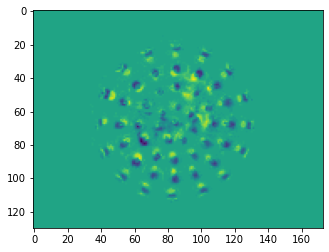

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
x = []
y = []
#print(x_train.shape)
x_train_resized = resize_images(x_train)
x_train_resized = x_train_resized[:,:,:,0:4]
rows = 5
columns = 6
#fig=plt.figure(figsize=(20, 20))
for ii in range(0,1):   
# if True: 
    sample_id = ii#np.random.randint(0, x_train_resized.shape[0])
    actual = y_train[sample_id]

    #print('Prediction:', predictions)
    #print('Actual:', actual)

    # plot the sample image
    
    #fig.add_subplot(rows, columns, ii+1)
    #plt.imshow(x_train_resized[ii,:,:,2])
    
    plt.imshow(x_train_resized[0,:,:,2])
    plt.show()

    # x.append((y_pred[predicted_class][0]-y_test[predicted_class][0])*180/np.pi)
    # y.append((y_pred[predicted_class][1]-y_test[predicted_class][1])*180/np.pi)
    #print(sample_id)
    print(np.array(x_train_resized[0,:,:,2]))
    im = Image.fromarray(np.array(x_train_resized[0,:,:,2]))
    if im.mode != 'RGB':
        im = im.convert('RGB')
    im.save("hdf5_frame.png")
    # predictions = open('F:\\ku.ac.ae\\Intelligent Robotic Manufacturing - Documents\\codes\\Visuotactile sensor\\contact_est\\compare_frames.txt',"a+")

    # predictions.write("\n Frame from training code: min \n{}\n max \n {}".format(mininmum, maximum))
    
    # predictions.close()

#plt.show()

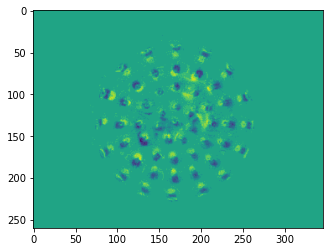

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
x = []
y = []
#print(x_train.shape)
x_train_resized = resize_images(x_train)
x_train_resized = x_train_resized[:,:,:,0:4]
x_train_resized = x_train[:,:,:,0:4]
rows = 5
columns = 6
#fig=plt.figure(figsize=(20, 20))
for ii in range(0,1):   
# if True: 
    sample_id = ii#np.random.randint(0, x_train_resized.shape[0])
    actual = y_train[sample_id]

    #print('Prediction:', predictions)
    #print('Actual:', actual)

    # plot the sample image
    
    #fig.add_subplot(rows, columns, ii+1)
    #plt.imshow(x_train_resized[ii,:,:,2])
    
    plt.imshow(x_train_resized[0,:,:,2])
    plt.show()

    # x.append((y_pred[predicted_class][0]-y_test[predicted_class][0])*180/np.pi)
    # y.append((y_pred[predicted_class][1]-y_test[predicted_class][1])*180/np.pi)
    #print(sample_id)
    print(np.array(x_train_resized[0,:,:,2]))
    im = Image.fromarray(np.array(x_train_resized[0,:,:,2]))
    if im.mode != 'RGB':
        im = im.convert('RGB')
    im.save("hdf5_frame.png")
    # predictions = open('F:\\ku.ac.ae\\Intelligent Robotic Manufacturing - Documents\\codes\\Visuotactile sensor\\contact_est\\compare_frames.txt',"a+")

    # predictions.write("\n Frame from training code: min \n{}\n max \n {}".format(mininmum, maximum))
    
    # predictions.close()

#plt.show()

In [8]:
# x_train = x_train[:,:,:,1:4]
# x_valid = x_valid[:,:,:,1:4]
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(189, 260, 346, 3)
(189, 2)
(63, 260, 346, 3)
(63, 2)


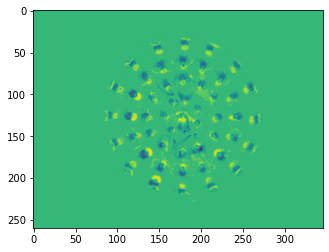

In [9]:
# Frame before re-sizing
import matplotlib.pyplot as plt
plt.imshow(x_train[2, :, :, 2])

In [14]:
#print min and max for before and after resize

image_idx = 70
print("before resizing: max: ", np.max(x_train[image_idx,:,:,2]), " min: ", np.min(x_train[image_idx,:,:,2])) 
print("agter resizing: max: ", np.max(x_train_resized[image_idx,:,:,2]), " min: ", np.min(x_train_resized[image_idx,:,:,2])) 

before resizing: max:  4.0  min:  -8.0
agter resizing: max:  4.0  min:  -8.0


In [9]:
# # resize images array 
# #from skimage.transform import resize

# # original shape is (260, 346, 3) == convert to (130, 173, 3)
# def resize_images(image_arrays, size=[130, 173], n_channels=3):
#     image_arrays = (image_arrays).astype('uint8')

#     resized_image_arrays = np.zeros([image_arrays.shape[0]] + size + [n_channels])
#     print (resized_image_arrays.shape)
#     for i, image_array in enumerate(image_arrays):
#         image = Image.fromarray(image_array[:,:,1:4])
#         resized_image = image.resize(size=[173, 130])
#         resized_image_arrays[i] = resized_image

#     return resized_image_arrays


In [15]:

x_train = resize_images(x_train)
x_valid = resize_images(x_valid)

input_shape = x_train.shape[1:]
# y_train = y_train*100
# y_valid = y_valid*100
print(input_shape)



(130, 173, 3)


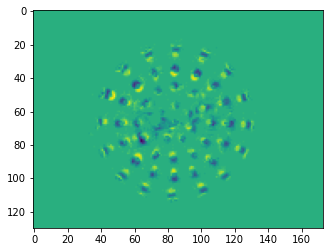

In [16]:
# Frame after re-sizing
plt.imshow(x_train[20,:,:,2])

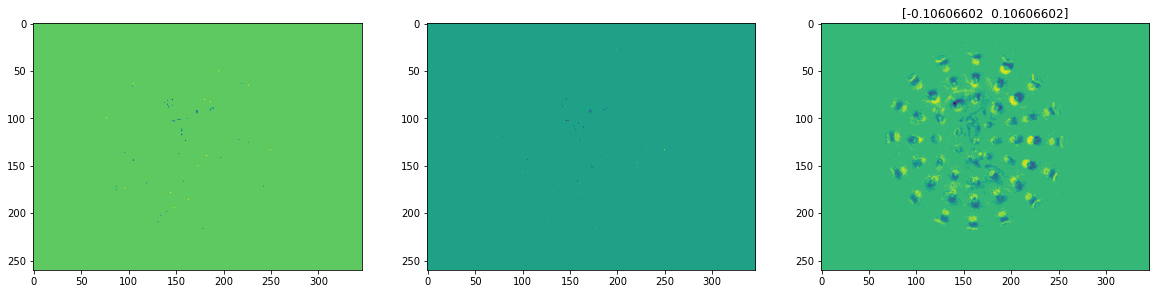

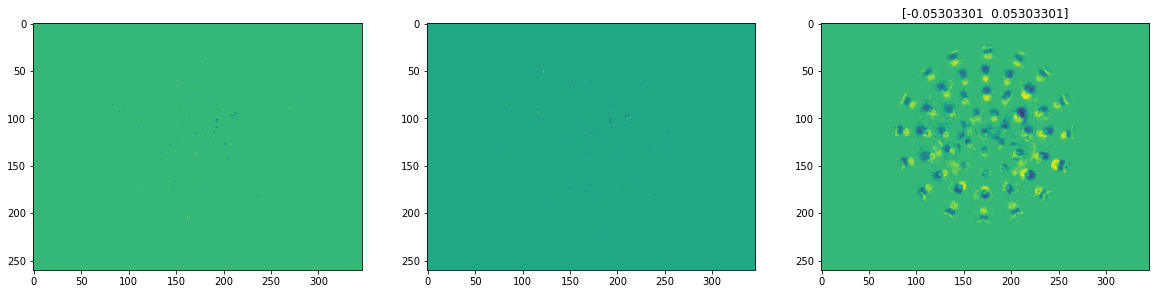

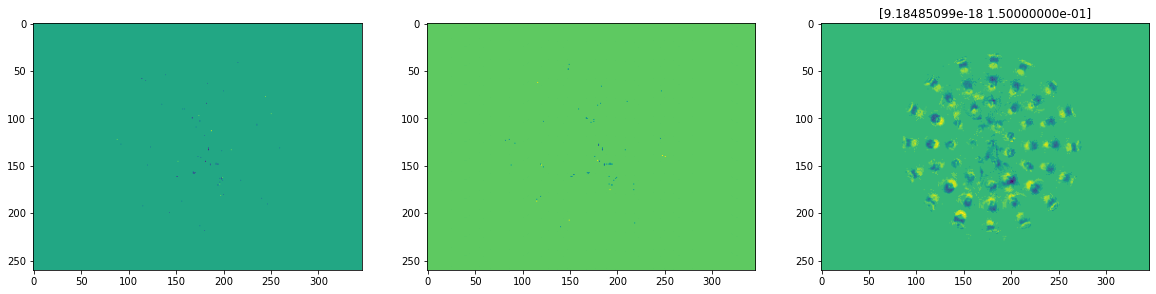

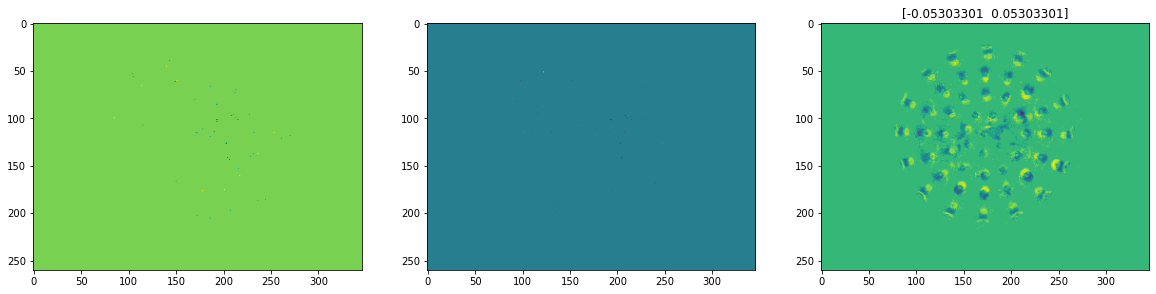

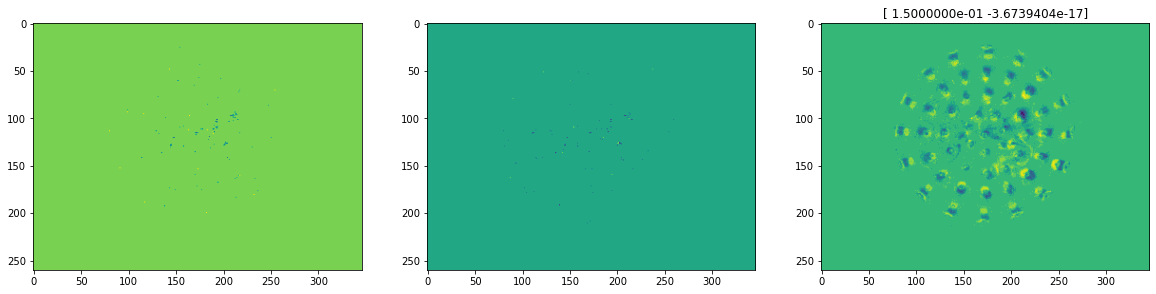

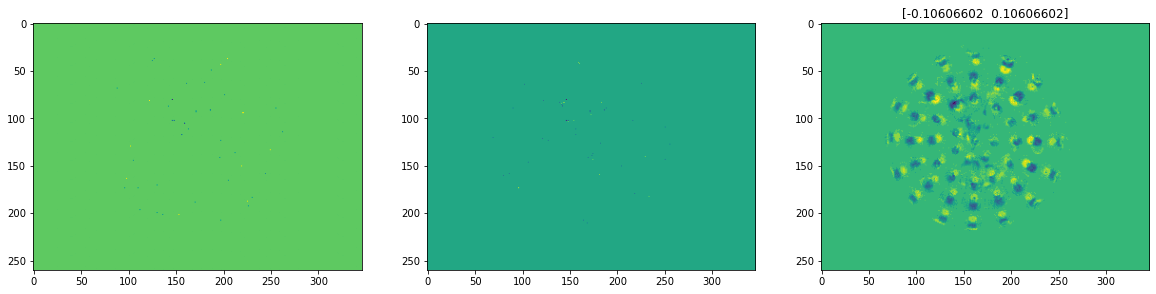

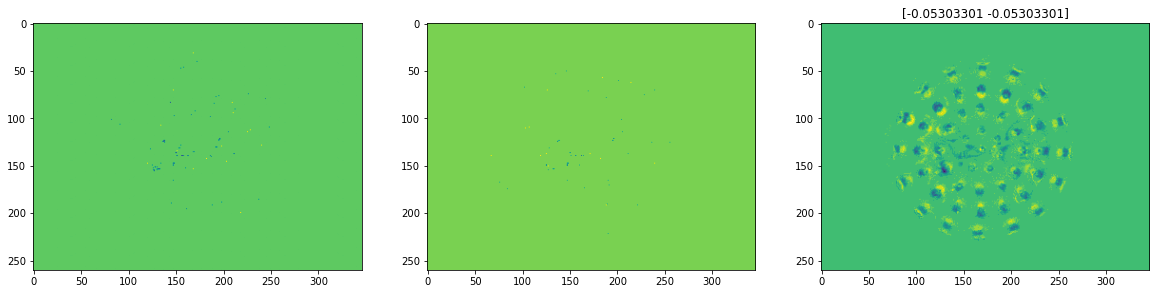

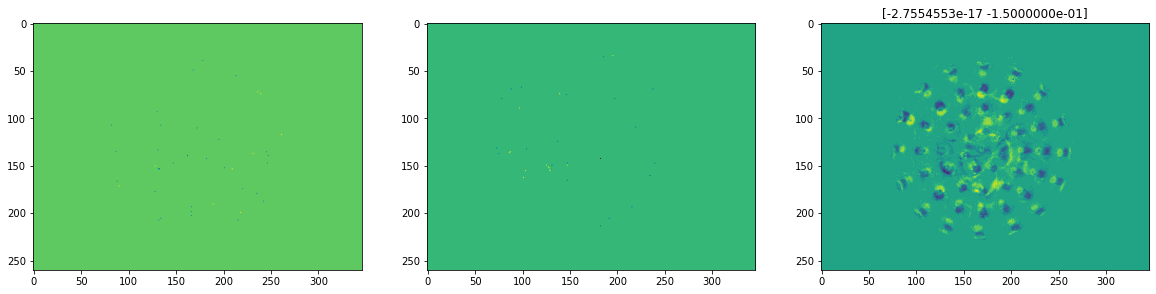

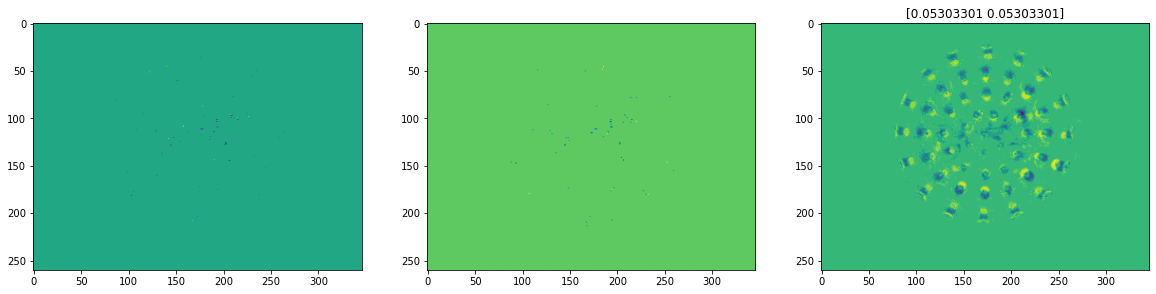

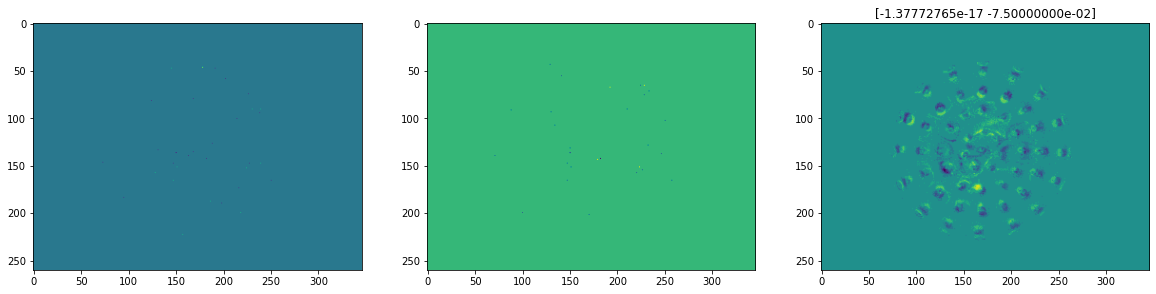

In [23]:
#plot frames and their angles
from random import randrange
N_examples = 10

for i in range(N_examples):
    idx = randrange(len(y_train))
    plt.figure(figsize=(20, 16))
    plt.subplot(1,3, 1)
    plt.imshow(x_train_resized[idx, :,:, 0])
    plt.subplot(1,3, 2)
    plt.imshow(x_train_resized[idx, :,:, 1])
    plt.subplot(1,3, 3)
    plt.imshow(x_train_resized[idx, :,:, 2])
    plt.title(y_train[idx])
    

[ 0.00000000e+00  5.30330086e-02  5.30330086e-02  5.30330086e-02
  5.30330086e-02  5.30330086e-02  1.06066017e-01  1.06066017e-01
  1.06066017e-01  1.06066017e-01  0.00000000e+00  5.30330086e-02
  5.30330086e-02  5.30330086e-02  5.30330086e-02  5.30330086e-02
  1.06066017e-01  1.06066017e-01  1.06066017e-01  1.06066017e-01
  0.00000000e+00 -5.30330086e-02 -5.30330086e-02 -5.30330086e-02
 -5.30330086e-02 -5.30330086e-02 -1.06066017e-01 -1.06066017e-01
 -1.06066017e-01 -1.06066017e-01  0.00000000e+00 -5.30330086e-02
 -5.30330086e-02 -5.30330086e-02 -5.30330086e-02 -5.30330086e-02
 -1.06066017e-01 -1.06066017e-01 -1.06066017e-01 -1.06066017e-01
  1.06066017e-01  4.59242550e-18  4.59242550e-18  4.59242550e-18
  4.59242550e-18  4.59242550e-18  9.18485099e-18  9.18485099e-18
  9.18485099e-18  9.18485099e-18  1.06066017e-01  7.50000000e-02
  7.50000000e-02  7.50000000e-02  7.50000000e-02  7.50000000e-02
  1.50000000e-01  1.50000000e-01  1.50000000e-01  1.50000000e-01
 -1.06066017e-01 -1.37772

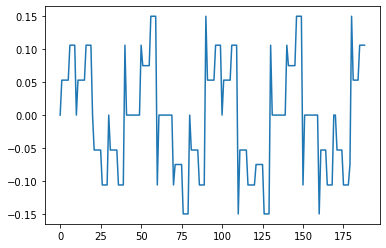

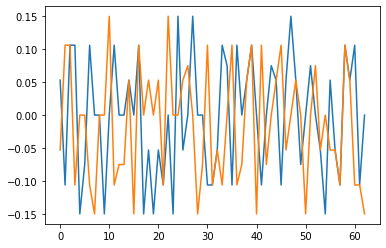

In [31]:
# print(y.shape)
plt.figure()
plt.plot(y_train[:,0])
plt.figure()
plt.plot(y_valid[:,:])
# print(y_train[:,0])

In [ ]:
plt.plot(y_valid)

# Training

Load Model

In [ ]:
# Load Saved Model and freeze layers
file_path = r'F:\ku.ac.ae\Intelligent Robotic Manufacturing - Documents\codes\Visuotactile sensor\contact_est\final\m3_130x173_512x16_DATASET_3'
loaded_model = tf.keras.models.load_model(file_path)

tf.keras.backend.set_epsilon(1)
model = tf.keras.models.Sequential(loaded_model.layers[:-3])

for layer in model.layers[:]:
    layer.trainable = False
    print(layer, layer.trainable)

# Add Layers
model.add(tfl.Flatten())
model.add(tfl.Dense(64, activation = 'softmax'))
model.add(tfl.Dense(2))

print(" Layers are ")

for layer in model.layers[:]:
    print(layer, layer.trainable)

model.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                loss='mean_absolute_percentage_error', 
                metrics=['mean_absolute_error'],
                #metrics=['accuracy'], 
                run_eagerly=True)
                
file_name = 'freezed_m3_130x173_512x32_dataset3'

In [9]:
from Model_R import m3, r1, r2, r3, r4, r5, vgg9_manual,vgg16, vgg16_manual, vgg19, ResNet50, xception, InceptionV3, DenseNet201

model = r4(input_shape, 0.4, 768, 'relu')

# for some unknown reason, the K.abs(y_true) term in the MAPE calculation on the training set is 
# lower than the fuzz default (1e-7), so it uses that default value instead, thus the huge numbers.
tf.keras.backend.set_epsilon(1)

model.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                loss='mean_absolute_percentage_error', 
                metrics=['mean_absolute_error'],
                #metrics=['accuracy'], 
                run_eagerly=True)
file_name = 'r4_130x173_512x32_dataset1_new_withuint'#'r5_130x173_512x32_old_sensor'#


Train Model

In [10]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]

history = model.fit(
                x_train, y_train, 
                epochs = 512,
                batch_size = 32,
                validation_data = (x_valid, y_valid),
                callbacks = callbacks_list,
                shuffle=True)

Epoch 1/100
6/6 [==============================] - 7s 396ms/step - loss: 48039.3906 - mean_absolute_error: 480.3939 - val_loss: 726.5714 - val_mean_absolute_error: 7.2657
Epoch 2/100
6/6 [==============================] - 0s 75ms/step - loss: 264.7453 - mean_absolute_error: 2.6475 - val_loss: 68.3523 - val_mean_absolute_error: 0.6835
Epoch 3/100
6/6 [==============================] - 0s 74ms/step - loss: 41.3073 - mean_absolute_error: 0.4131 - val_loss: 14.7647 - val_mean_absolute_error: 0.1476
Epoch 4/100
6/6 [==============================] - 0s 75ms/step - loss: 15.0713 - mean_absolute_error: 0.1507 - val_loss: 9.7765 - val_mean_absolute_error: 0.0978
Epoch 5/100
6/6 [==============================] - 0s 75ms/step - loss: 8.4483 - mean_absolute_error: 0.0845 - val_loss: 7.2230 - val_mean_absolute_error: 0.0722
Epoch 6/100
6/6 [==============================] - 0s 75ms/step - loss: 7.0412 - mean_absolute_error: 0.0704 - val_loss: 7.2188 - val_mean_absolute_error: 0.0722
Epoch 7/100
6

In [12]:
# Save trained model
location = 'reg(new_dataset_collection)'
model.save('F:\\ku.ac.ae\\Intelligent Robotic Manufacturing - Documents\\codes\\Visuotactile sensor\\contact_est\\{}\\{}\\'.format(location, file_name))

INFO:tensorflow:Assets written to: F:\ku.ac.ae\Intelligent Robotic Manufacturing - Documents\codes\Visuotactile sensor\contact_est\reg(new_dataset_collection)\r4_130x173_512x32_dataset1_new\assets


# Evaluation

In [30]:
# load trained model
file_name = 'r4_130x173_512x32_dataset3'
location = 'reg'
model = tf.keras.models.load_model('F:\\ku.ac.ae\\Intelligent Robotic Manufacturing - Documents\\codes\\Visuotactile sensor\\contact_est\\{}\\{}\\'.format(location, file_name))

In [11]:
# evaluate train and dev data sets
tf.keras.backend.set_epsilon(1)
model.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                loss='mean_absolute_percentage_error', 
                #metrics=['mean_absolute_error'],
                metrics=['accuracy'], 
                run_eagerly=True)
train_loss, train_acc = model.evaluate(x_train, y_train)
valid_loss, valid_acc = model.evaluate(x_valid, y_valid)

3/3 [==============================] - 0s 14ms/step - loss: 7.1061 - accuracy: 0.5882


Plot Acc. & Loss

NameError: name 'location' is not defined

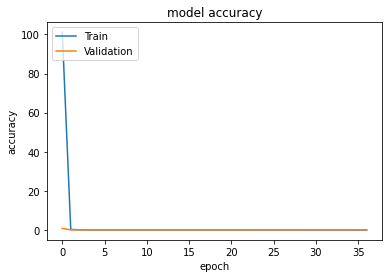

In [12]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("F:\\ku.ac.ae\\Intelligent Robotic Manufacturing - Documents\\codes\\Visuotactile sensor\\contact_est\\{}\\{}\\{}_acc.png".format(location, file_name, file_name))
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("F:\\ku.ac.ae\\Intelligent Robotic Manufacturing - Documents\\codes\\Visuotactile sensor\\contact_est\\{}\\{}\\{}_loss.png".format(location, file_name, file_name))
plt.show()


Visualize Model

In [11]:
# plot model
import visualkeras
from tensorflow.keras.utils import plot_model
plot_model(model, "F:\\ku.ac.ae\\Intelligent Robotic Manufacturing - Documents\\codes\\Visuotactile sensor\\contact_est\\{}\\{}\\{}_plot_model.png".format(location, file_name, file_name), show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


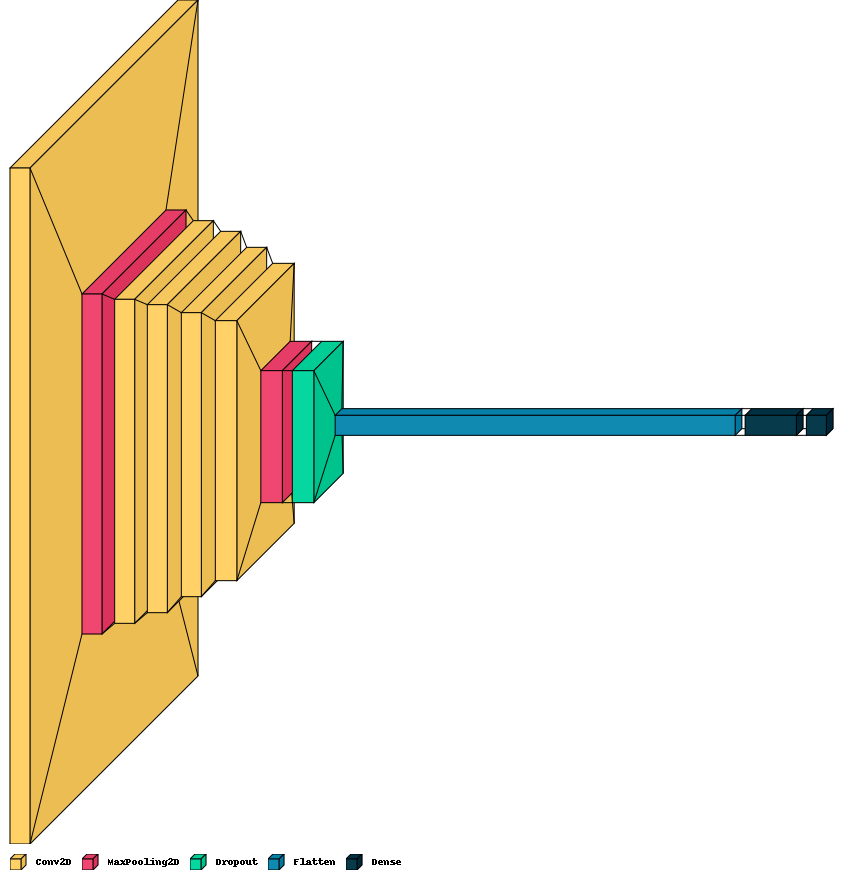

In [12]:
visualkeras.layered_view(model, "F:\\ku.ac.ae\\Intelligent Robotic Manufacturing - Documents\\codes\\Visuotactile sensor\\contact_est\\{}\\{}\\{}_model.png".format(location, file_name, file_name), legend=True)

# Test Evaluation

In [13]:
# load trained model
file_name = 'r4_130x173_512x32_dataset3'
location = 'reg'
model = tf.keras.models.load_model('F:\\ku.ac.ae\\Intelligent Robotic Manufacturing - Documents\\codes\\Visuotactile sensor\\contact_est\\{}\\{}'.format(location, file_name))

In [32]:
x_test, y_test,_ = data_loader.get_test_data()
x_test = resize_images(x_test, n_channels=6)
# y_test = y_test*100

In [13]:
print(y_valid.shape)
x_test = x_test[:,:,:,1:4]
print(x_test.shape)

(63, 2)


NameError: name 'x_test' is not defined

In [34]:
tf.keras.backend.set_epsilon(1)
model.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                loss='mean_absolute_percentage_error', 
                #metrics=['mean_absolute_error'],
                metrics=['accuracy'], 
                run_eagerly=True)
test_loss, test_acc = model.evaluate(x_test, y_test)

7/7 [==============================] - 1s 60ms/step - loss: 4.8520 - accuracy: 0.4061


In [14]:
print(x_valid.shape)
y_pred = model.predict(x_train)
#print(y_pred)
angle_error = []
for i in range(len(y_train)):
    diff_x = np.absolute(y_pred[i][0] - y_train[i][0])
    diff_y = np.absolute(y_pred[i][1] - y_train[i][1])
    angle_diff = np.sqrt(np.square(diff_x) + np.square(diff_y))
    angle_error.append(angle_diff*180/3.14159265359)


max_error = max(angle_error)
print ('maximum error in deg: {:.4f}'.format(max_error))

mean_error = np.mean(angle_error)
print ('mean error in deg: {:.4f}'.format(mean_error))
print(angle_error)

(63, 130, 173, 3)
maximum error in deg: 11.2364
mean error in deg: 5.8817
[0.340725238119135, 2.7562529418820443, 1.9293511773423564, 5.730597952693409, 5.220059919365746, 3.164186134237571, 8.4529834854571, 8.029925824886005, 5.747727443633341, 7.90324821301021, 0.9158739077530633, 4.444363422369902, 5.396719002833119, 5.305683287257952, 4.616299896310444, 4.121138833200991, 7.88907688253956, 8.040200642213872, 8.390826974313708, 8.222199574667387, 0.9264016551689519, 5.081168560027341, 3.663341414820315, 4.551204490431759, 3.6672783006658376, 4.187618915376035, 7.8968850463211435, 8.864976964126623, 10.807611291064196, 6.644794154934103, 1.7561859693518993, 3.2397579507691576, 4.2044026593692925, 3.366674639525015, 4.17656287020765, 2.271898082380599, 6.7662160351611655, 7.649766410583328, 8.721826256833912, 6.963509368206488, 6.891455745300386, 3.8358236123373652, 3.6080260288922807, 4.5085825548121345, 3.4946098454711843, 3.543334995406662, 7.48491319272829, 7.729632330480318, 8.20

Prediction: [-0.00075143 -0.00589911]
Actual: [9.18485099e-18 1.50000000e-01]


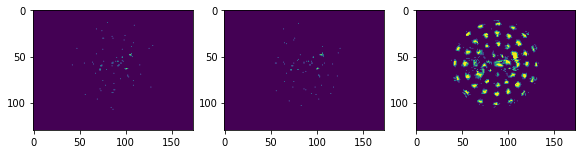

0
Prediction: [0.02560658 0.01351152]
Actual: [-1.37772765e-17 -7.50000000e-02]


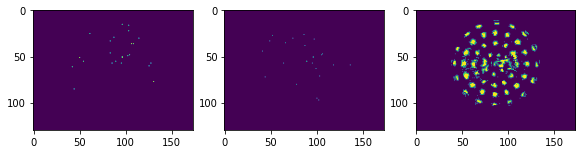

1
Prediction: [0.0534661  0.01936226]
Actual: [ 0.10606602 -0.10606602]


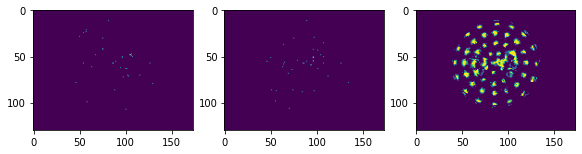

2
Prediction: [-0.03863059  0.01301619]
Actual: [4.5924255e-18 7.5000000e-02]


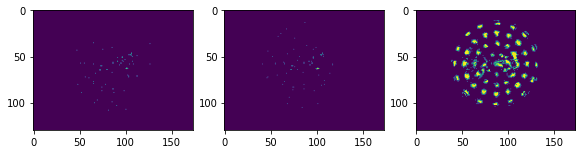

3
Prediction: [-0.02777405  0.01095275]
Actual: [-0.05303301 -0.05303301]


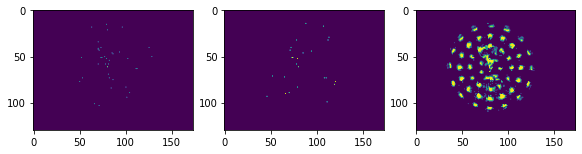

4
Prediction: [0.03438738 0.00105039]
Actual: [-2.7554553e-17 -1.5000000e-01]


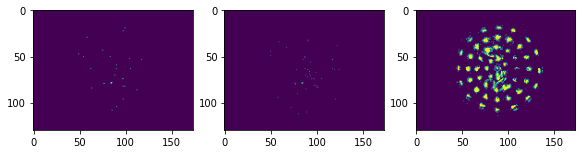

5
Prediction: [ 0.00852599 -0.00462161]
Actual: [9.18485099e-18 1.50000000e-01]


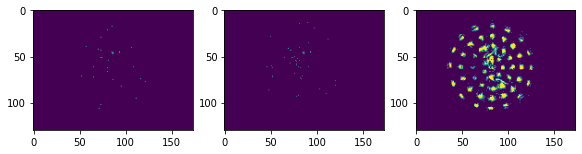

6
Prediction: [0.0036528  0.01039379]
Actual: [ 7.5000000e-02 -1.8369702e-17]


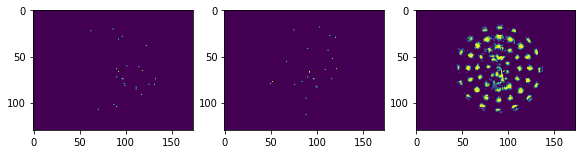

7


In [12]:
x = []
y = []

for i in range(8):   
# if True: 
    sample_id = i#np.random.randint(0, x_test.shape[0])
    
    predictions = y_pred[sample_id]
    actual = y_valid[sample_id]

    print('Prediction:', predictions)
    print('Actual:', actual)

    # plot the sample image
    fig=plt.figure(figsize=(20, 20))
    rows = 1
    columns = 6
    for ii in range(0, 3):
        fig.add_subplot(rows, columns, ii+1)
        plt.imshow(x_valid[sample_id,:,:,ii].reshape(130,173, 1))
    plt.show()
    # plt.imshow(x_train_resized[sample_id,:,:,1].reshape(130,173, 1))
    # plt.show()

    # x.append((y_pred[predicted_class][0]-y_test[predicted_class][0])*180/np.pi)
    # y.append((y_pred[predicted_class][1]-y_test[predicted_class][1])*180/np.pi)
    print(sample_id)

In [ ]:
# x = []
# y = []
# for i in range(8):   
# # if True: 
#     sample_id = np.random.randint(0, x_test.shape[0])
#     predictions = y_pred[sample_id]
#     actual = y_test[sample_id]

#     print('Prediction:', predictions)
#     print('Actual:', actual)

#     # plot the sample image
#     plt.imshow(x_test[sample_id].reshape(130,173, 3))
#     plt.show()

#     # x.append((y_pred[predicted_class][0]-y_test[predicted_class][0])*180/np.pi)
#     # y.append((y_pred[predicted_class][1]-y_test[predicted_class][1])*180/np.pi)
#     print(sample_id)


In [ ]:
print(x)
print(y)

[]
[]


# TUNE

In [ ]:
def m4(hp):
    model = tf.keras.models.Sequential([])
    model.add(tfl.Conv2D(hp.Int("input_units", min_value=8, max_value=128, step=16), (5,5), activation='relu', input_shape=input_shape[1:]))
    model.add(tfl.MaxPooling2D((2,2), strides=2, padding='same'))

    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(tfl.Conv2D(hp.Int(f"conv_{i}_units", min_value=16, max_value=215, step=16), (7,7), activation='relu'))
        model.add(tfl.MaxPooling2D((2,2), strides=2, padding='same'))
        model.add(tfl.Dropout(hp.Float(f'dropout_{i}_units', min_value=0.1, max_value=0.8, step=0.1)))

    model.add(tfl.Flatten())
    model.add(tfl.Dense(units=hp.Int('dense_1_units', min_value=8, max_value=64, step=16), activation='relu'))
    model.add(tfl.Dense(2))

    tf.keras.backend.set_epsilon(1)
    model.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                loss='mean_absolute_percentage_error', 
                # metrics=['mean_absolute_error'],
                metrics=['accuracy'], 
                run_eagerly=True)
    return model

from keras_tuner import Objective

tuner = Hyperband(
    m4,
    max_epochs=16,
    objective=Objective(name="val_loss",direction="min"),
    # executions_per_trial=5,
    directory="results_4",
    overwrite=True,
    project_name="regression"
)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
callbacks_list = [early_stopping]

tuner.search(x_train, y_train, validation_data=(x_valid, y_valid), callbacks=callbacks_list)


Search: Running Trial #30

Value             |Best Value So Far |Hyperparameter
72                |104               |input_units
1                 |3                 |n_layers
16                |128               |conv_0_units
0.3               |0.1               |dropout_0_units
56                |8                 |dense_1_units
64                |176               |conv_1_units
0.4               |0.3               |dropout_1_units
144               |160               |conv_2_units
0.3               |0.5               |dropout_2_units
16                |16                |tuner/epochs
0                 |6                 |tuner/initial_epoch
0                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/16
11/11 [==============================] - 1s 54ms/step - loss: 1270.6600 - accuracy: 0.4880 - val_loss: 663.2910 - val_accuracy: 0.4776
Epoch 2/16
11/11 [==============================] - 1s 49ms/step - loss: 1041.9717 - accuracy: 0.

UnknownError: Failed to rename: results_4\regression\trial_0029\checkpoint_temp/part-00000-of-00001.data-00000-of-00001 to: results_4\regression\trial_0029\checkpoint.data-00000-of-00001 : Access is denied.
; Input/output error [Op:MergeV2Checkpoints]

In [ ]:
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'input_units': 56, 'n_layers': 1, 'conv_0_units': 112, 'dropout_0_units': 0.4, 'dense_1_units': 40, 'conv_1_units': 32, 'dropout_1_units': 0.6, 'conv_2_units': 208, 'dropout_2_units': 0.4, 'tuner/epochs': 16, 'tuner/initial_epoch': 6, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0019'}


In [ ]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 169, 104)     7904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 85, 104)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 79, 128)       652416    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 40, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 40, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 34, 176)       1104048   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 17, 176)       0

In [ ]:
tuner.results_summary(num_trials=2)

Results summary
Results in results_4\regression
Showing 2 best trials
Trial summary
Hyperparameters:
input_units: 56
n_layers: 1
conv_0_units: 112
dropout_0_units: 0.4
dense_1_units: 40
conv_1_units: 32
dropout_1_units: 0.6
conv_2_units: 208
dropout_2_units: 0.4
tuner/epochs: 16
tuner/initial_epoch: 6
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019
Score: 0.9030366539955139
Trial summary
Hyperparameters:
input_units: 88
n_layers: 1
conv_0_units: 48
dropout_0_units: 0.4
dense_1_units: 56
conv_1_units: 96
dropout_1_units: 0.6
conv_2_units: 176
dropout_2_units: 0.30000000000000004
tuner/epochs: 16
tuner/initial_epoch: 6
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 1.041602611541748
